## Business Problem Statement Understanding: 

### Problem Statement

Build a Car Price prediction using Machine Learning.

One of well know start-up in germany namely UsedCar.com, is an online marketplace that enables customers to sell or buy a vehicle throughout Germany. When they receive a request to sell an automobile, one of their sales representatives goes to the client's location to gather all the information, including Brand Name, Model Name, year, Engine Fuel Type, and Engine HP, etc. Once you return to the office, the backend staff will analyze the information that the salesperson supplied and forecast the car's current pricing. The salesperson then visits the client once more to discuss the price. 

They find the process to be extremely time-consuming, so they resolve to make it intelligent, automated, and clever. They therefore decide to use a system that will forecast the client's pricing. As a result, the client will be pleased with the special response and be able to sell or buy a car through UsedCar.com, increasing the company's share price by 35% after making the procedure quick and creative.

They therefore made the decision to create a website that will display the current pricing of the automobile based on user inputs such as Brand Name, Model Name, year, Engine Fuel Type, and Engine HP, etc. Here, they plan to employ a machine learning algorithm that will automatically forecast the price of the car based on its characteristics.

For that, our domain experts and data analysts met with the client at Quikr's headquarters to better grasp their problem and expectations. So they asked the client directly for the necessary information.

    Now we observe the each features present in the dataset.<br>

 `Make:` The Make feature is the brand name of the Car.<br>
`Model:` The Model feature is the brand of model or different version of Car models.<br>
`Year:`  The year describes the year of launched.<br>
`Engine Fuel Type:` It defines the Fuel type of the car model.<br>
`Engine HP:` Engine HP means Horsepower that refers to the power an engine produces.<br>
`Engine Cylinders:` Engine Cylinders are number of cylinders in present in the engine.<br>
`Transmission Type:` It is the type of feature that describe about the car transmission type i.e Mannual or automatic.<br>
`Driven_Wheels:` The type of wheel drive.<br>
`No of doors:` It defined nos of doors present in the car.<br>
`Market Category:` This features tells about the type of car or which category the car belongs. <br>
`Vehicle Size:` It's say about the about car size.<br>
`Vehicle Style:` The feature is all about the style that belongs to car.<br>
`highway MPG:` The average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.<br>
`city mpg:` City MPG refers to driving with occasional stopping and braking.<br>
`Popularity:` It can refered to rating of that car or popularity of car.<br>
`MSRP:` The price of that car.

In order to detect patterns in the dataset using the aforementioned features and attributes supplied by the client, the client wishes to train a machine learning pipeline. Once the user provides new information, our ML model will then automatically predict the price of the car.

As we are aware, Price exhibits consistent behavior. It is referred to as "Regression." Therefore, the price prediction for cars falls within the "Regression" linked kind. So, in order to forecast the cost of the car, we are utilizing the "Regression Algorithm."

### Import all libraries

In [470]:
import os

import pandas as pd
import numpy as np
from scipy.stats import normaltest,shapiro
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Here, we have loaded 3 types of Libraries

a) Inbuilt Library


b) Third-Party Library


c) Skitlearn Library

## Data Collection

According to client inputs, our domain experts and data analysts team created the dataset in.CSV format. Additionally, we will train our machine learning (ML) algorithm using the same dataset.

In [471]:
df= pd.read_csv('Cars_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Load the dataset files with csv extension from the dataset folder.

In [472]:
print('No. of Rows: ',df.shape[0])
print('No. of Columns: ',df.shape[1])

No. of Rows:  11914
No. of Columns:  16


### Spliting the dataset into Training dataset and Testing Dataset

In [473]:
df_train, df_test = train_test_split(df,test_size=0.2,random_state=20)

print('df_train size: ',df_train.shape)
print('df_test size: ',df_test.shape)

df_train size:  (9531, 16)
df_test size:  (2383, 16)


To prevent the problem of data leakage, we divided the data at the very beginning of the task. When the information that we use to train a machine learning algorithm is present in the training data, this is referred to as data leakage in machine learning. As a result, we divide the testing data from the training data (used to train the model) (To predict the data outcome).

## Data Exploration

Here, We have performed the data exploration task on the df_train (Training) dataset.

In [474]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9531 entries, 5478 to 10714
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               9531 non-null   object 
 1   Model              9531 non-null   object 
 2   Year               9531 non-null   int64  
 3   Engine Fuel Type   9529 non-null   object 
 4   Engine HP          9475 non-null   float64
 5   Engine Cylinders   9510 non-null   float64
 6   Transmission Type  9531 non-null   object 
 7   Driven_Wheels      9531 non-null   object 
 8   Number of Doors    9526 non-null   float64
 9   Market Category    6551 non-null   object 
 10  Vehicle Size       9531 non-null   object 
 11  Vehicle Style      9531 non-null   object 
 12  highway MPG        9531 non-null   int64  
 13  city mpg           9531 non-null   int64  
 14  Popularity         9531 non-null   int64  
 15  MSRP               9531 non-null   int64  
dtypes: float64(3), int64

df_train.info() >> This gives us information about the attributes, data type of the attribute, information about the null values of the attributes, memory size of the class which is 39.0+ KB.

We have observed that all the attributes are having 'Object' dtype.

Here, We will try to find out the Explicit and Implicit Missing values in our Dataset.

In [475]:
df_train['Make'].value_counts()

Chevrolet        881
Ford             708
Volkswagen       648
Toyota           593
Dodge            493
Nissan           445
GMC              408
Honda            355
Mazda            340
Cadillac         327
Suzuki           295
Mercedes-Benz    276
BMW              275
Audi             268
Infiniti         261
Hyundai          243
Volvo            222
Subaru           209
Acura            205
Kia              184
Mitsubishi       172
Lexus            160
Pontiac          155
Buick            154
Chrysler         151
Lincoln          140
Land Rover       114
Oldsmobile       112
Porsche          105
Saab              92
Plymouth          71
Aston Martin      71
Bentley           60
Ferrari           56
FIAT              49
Maserati          48
Scion             44
Lamborghini       43
Rolls-Royce       28
Lotus             20
Tesla             14
HUMMER            12
Maybach           11
McLaren            5
Bugatti            3
Alfa Romeo         3
Spyker             1
Genesis      

df_train['name'].value_counts() >> Here, we are getting value count of each samples present in the ['name'] attributes.

In [476]:
df_train['Model'].value_counts()

Silverado 1500        126
Tundra                104
F-150                 103
Sierra 1500            68
Beetle Convertible     67
                     ... 
Q40                     1
Azure T                 1
650S Coupe              1
Pulsar                  1
GTO                     1
Name: Model, Length: 908, dtype: int64

df_train['name'].unique() >> helps us to give the unique values present in the ['name'] attributes

In [477]:
df_train.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [478]:
for column in list(df.select_dtypes(include='object')):
  print(column, ': ', df_train[column].unique())
  print('\n','*'*110)

Make :  ['Pontiac' 'Suzuki' 'Volkswagen' 'Mazda' 'BMW' 'Hyundai' 'Lamborghini'
 'Cadillac' 'Scion' 'Honda' 'Mercedes-Benz' 'Ford' 'Toyota' 'Infiniti'
 'Kia' 'Volvo' 'Dodge' 'Ferrari' 'Mitsubishi' 'Oldsmobile' 'Nissan'
 'Chevrolet' 'Lexus' 'Acura' 'FIAT' 'HUMMER' 'Plymouth' 'GMC' 'Maybach'
 'Aston Martin' 'Land Rover' 'Maserati' 'Chrysler' 'Audi' 'Lincoln'
 'Bentley' 'Porsche' 'Saab' 'Buick' 'Subaru' 'Lotus' 'Rolls-Royce' 'Tesla'
 'Bugatti' 'Spyker' 'McLaren' 'Alfa Romeo' 'Genesis']

 **************************************************************************************************************
Model :  ['Grand Am' 'XL-7' 'GTI' 'Tribute' 'Tiguan' 'M6' 'Entourage'
 'ActiveHybrid 5' 'Murcielago' '6' 'CTS' '1 Series' 'xD' 'Crosstour'
 'GLA-Class' 'C-Class' 'Freestar' 'MX-3' 'Golf GTI' 'Sequoia'
 'Five Hundred' 'EX' 'Soul' 'XC70' 'Dakota' 'F430' 'Grand Caravan' 'ECHO'
 'Golf SportWagen' 'Outlander Sport' 'Alero' 'Element' 'Kizashi' 'Altima'
 'Traverse' 'Catera' '4 Series' 'Monaco' 'Prelude' 

In [479]:
for column in list(df_train.select_dtypes(include='int')):
  print(column, ': ', df_train[column].unique())
  print('\n','*'*112)

Year :  [2004 2013 2011 2015 2016 2007 2009 2017 2014 2005 1993 2006 2012 2010
 2003 2000 1990 1994 2002 2008 2001 1999 1995 1992 1996 1998 1997 1991]

 ****************************************************************************************************************
highway MPG :  [ 27  20  31  28  26  23  30  13  33  37  35  22  34  17  24  18  16  25
  38  32  29  19  15  21  36 108  39  42  14  45 109  40 110  48  41  92
  43  44  53  50 101 105  99  90  46 102  47 107 100  12  97  82 103  74
 111 106  98]

 ****************************************************************************************************************
city mpg :  [ 18  15  21  14  16  23   8  24  25  19  27  20  22  13  17  11  30  10
  12 122  26  31  42  28  32   9  34 128  40  35  29  51 120  39  36  50
  33  41  55  44  54 126  92 110  43  88  53 101 102  49  91 124  47 132
  94  85  37  98 121  78 137  58   7 129  38  89  95]

 ************************************************************************************

## Normality Test

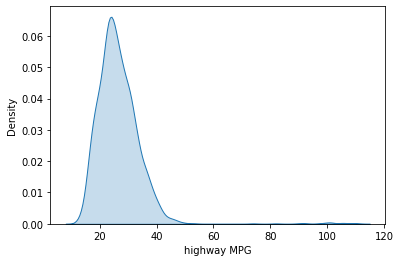

In [480]:
sns.kdeplot(df_train['highway MPG'], fill = True)

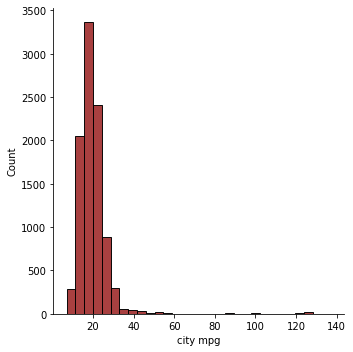

In [481]:
sns.displot(df_train['city mpg'],color='darkred',bins=30)

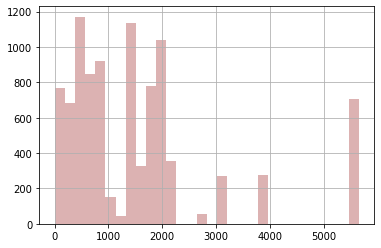

In [482]:
df_train['Popularity'].hist(color='darkred',bins=30,alpha=0.3)

## Outliers Detection

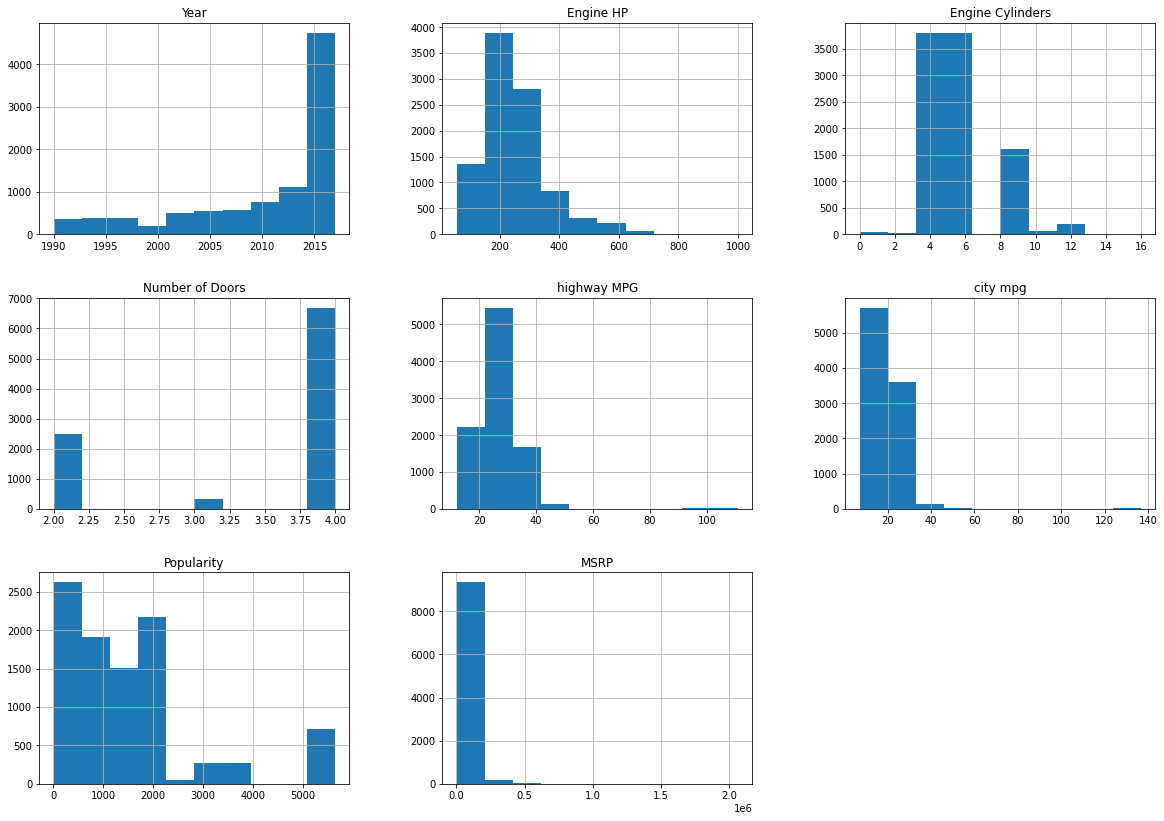

In [483]:
df_train.hist(figsize=(20,14))
plt.show()

### Normal & Shapiro Test

In [484]:
df_train.select_dtypes(include='int')

,Year,highway MPG,city mpg,Popularity,MSRP
5478,2004,27,18,210,23530
11666,2004,20,15,481,24499
5666,2013,31,21,873,25095
10824,2011,28,21,586,23740
10414,2015,26,21,873,28250
...,...,...,...,...,...
9620,2017,22,17,1385,37370
7068,1999,22,15,5657,4584
7391,2017,27,20,436,31695
4367,2009,19,13,5657,32360


In [485]:
status,p_val = normaltest(df_train['highway MPG'])
print('p value is :', p_val)
if p_val.all() > 0.05:
    print('Null hypothesis >> Data is Normally Distributed')
else:
    print('Alternate Hypothesis >> Data is not Normally distributed')

p value is : 0.0
Alternate Hypothesis >> Data is not Normally distributed


In [486]:
status,p_val = normaltest(df_train['city mpg'])
print('p value is :', p_val)
if p_val.all() > 0.05:
    print('Null hypothesis >> Data is Normally Distributed')
else:
    print('Alternate Hypothesis >> Data is not Normally distributed')

p value is : 0.0
Alternate Hypothesis >> Data is not Normally distributed


In [487]:
status,p_val = normaltest(df_train['Popularity'])
print('p value is :', p_val)
if p_val.all() > 0.05:
    print('Null hypothesis >> Data is Normally Distributed')
else:
    print('Alternate Hypothesis >> Data is not Normally distributed')

p value is : 0.0
Alternate Hypothesis >> Data is not Normally distributed


### Z-Score Test

In [488]:
mean = df_train['highway MPG'].mean()
std = df_train['highway MPG'].std()
print('mean: ', mean)
print('std: ', std)

print('*'*100)

threshold = 3
outliers = []
for val in df_train['highway MPG']:
    z_score = (val - mean)/std
    if np.abs(z_score) > threshold:
        outliers.append(val)
        
print('Detected Outliers are:',outliers)

mean:  26.606127373832756
std:  8.37683686242372
****************************************************************************************************
Detected Outliers are: [108, 109, 110, 92, 109, 53, 101, 105, 99, 90, 101, 92, 102, 99, 90, 99, 109, 107, 92, 105, 109, 100, 101, 101, 90, 105, 97, 53, 82, 97, 105, 107, 101, 101, 99, 103, 99, 101, 74, 111, 53, 111, 106, 74, 109, 82, 101, 105, 101, 101, 98, 106, 82, 74, 92, 102, 92, 53, 105]


In [489]:
mean = df_train['city mpg'].mean()
std = df_train['city mpg'].std()
print('mean: ', mean)
print('std: ', std)

print('*'*100)

threshold = 3
outliers = []
for val in df_train['city mpg']:
    z_score = (val - mean)/std
    if np.abs(z_score) > threshold:
        outliers.append(val)
        
print('Detected Outliers are:',outliers)

mean:  19.746721225474765
std:  9.080187170958114
****************************************************************************************************
Detected Outliers are: [122, 128, 128, 51, 120, 50, 128, 55, 54, 126, 92, 110, 88, 51, 126, 120, 53, 101, 110, 53, 88, 126, 50, 50, 53, 128, 50, 54, 101, 120, 102, 128, 49, 91, 126, 54, 53, 124, 47, 88, 132, 94, 50, 55, 53, 54, 85, 49, 94, 126, 49, 101, 126, 98, 53, 110, 121, 53, 126, 124, 51, 54, 53, 78, 137, 53, 58, 137, 129, 78, 128, 53, 85, 51, 126, 132, 126, 126, 89, 95, 85, 78, 54, 120, 53, 121, 51, 54, 120, 47, 58, 53, 126, 53]


In [490]:
mean = df_train['Engine HP'].mean()
std = df_train['Engine HP'].std()
print('mean: ', mean)
print('std: ', std)

print('*'*100)

threshold = 3
outliers = []
for val in df_train['Engine HP']:
    z_score = (val - mean)/std
    if np.abs(z_score) > threshold:
        outliers.append(val)
        
print('Detected Outliers are:',outliers)

mean:  248.97456464379948
std:  108.82531417208335
****************************************************************************************************
Detected Outliers are: [631.0, 597.0, 662.0, 620.0, 662.0, 631.0, 645.0, 610.0, 621.0, 580.0, 600.0, 600.0, 620.0, 610.0, 616.0, 616.0, 583.0, 626.0, 604.0, 650.0, 650.0, 700.0, 1001.0, 626.0, 583.0, 631.0, 662.0, 621.0, 650.0, 616.0, 620.0, 700.0, 650.0, 621.0, 707.0, 631.0, 631.0, 621.0, 605.0, 707.0, 641.0, 707.0, 577.0, 650.0, 650.0, 600.0, 645.0, 651.0, 645.0, 731.0, 700.0, 624.0, 600.0, 621.0, 707.0, 645.0, 582.0, 620.0, 621.0, 750.0, 650.0, 577.0, 621.0, 731.0, 624.0, 645.0, 621.0, 621.0, 621.0, 707.0, 720.0, 577.0, 750.0, 631.0, 582.0, 640.0, 650.0, 577.0, 650.0, 616.0, 632.0, 632.0, 611.0, 626.0, 670.0, 583.0, 605.0, 626.0, 611.0, 616.0, 600.0, 577.0, 650.0, 645.0, 700.0, 600.0, 700.0, 621.0, 577.0, 700.0, 577.0, 626.0, 600.0, 577.0, 622.0, 660.0, 617.0, 645.0, 651.0, 597.0, 577.0, 1001.0, 624.0, 600.0, 645.0, 650.0, 605.0, 592

### Inter Quartile Range(IQR)

In [491]:
q1 = df_train['Engine HP'].quantile(0.25)
q2 = df_train['Engine HP'].quantile(0.5)
q3 = df_train['Engine HP'].quantile(0.75)

print(f'1st Quartile  >> 25th percentile of the data = {q1}')
print(f'2nd Quartile  >> 50th percentile of the data = {q2}')
print(f'3rd Quartile  >> 75th percentile of the data = {q3}')
print('*'*112)

iqr = q3 - q1
print('Inter Quartile Range(IQR): ', iqr)
print('*'*112)

lower_tail = q1 - 3 * iqr #Extreme Outliers
upper_tail = q3 + 3 * iqr #Extreme Outliers
print('Lower tail is :',lower_tail)
print('Upper tail is :',upper_tail)

print('*'*100)

df_train.reset_index(inplace=True, drop=True)
outliers = []
for i in range(len(df_train)):
    df_train.loc[i,'Engine HP']
    if (i > q1+(1.5*iqr)) or (i < q1-(1.5*iqr)):
        outliers.append(i)

print('Outliers for Engine HP: ', outliers)

1st Quartile  >> 25th percentile of the data = 170.0
2nd Quartile  >> 50th percentile of the data = 225.0
3rd Quartile  >> 75th percentile of the data = 300.0
****************************************************************************************************************
Inter Quartile Range(IQR):  130.0
****************************************************************************************************************
Lower tail is : -220.0
Upper tail is : 690.0
****************************************************************************************************
Outliers for Engine HP:  [366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447,

### Boxplot Method


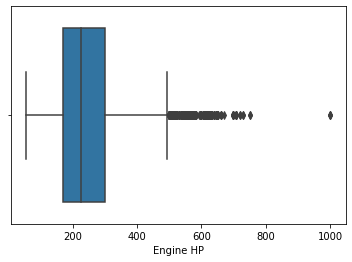

In [492]:
sns.boxplot(x= df_train['Engine HP'])

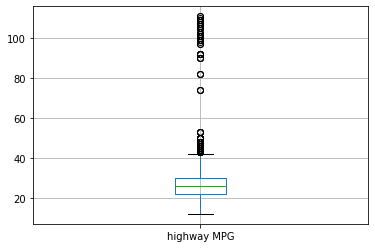

In [493]:
df_train.boxplot('highway MPG')

In [494]:
df_train.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,9531.000000,9475.000000,9510.000000,9526.000000,9531.000000,9531.000000,9531.000000,9.531000e+03
mean,2010.355996,248.974565,5.626709,3.440374,26.606127,19.746721,1557.699507,4.068396e+04
std,7.555149,108.825314,1.784205,0.877938,8.376837,9.080187,1446.055539,6.243836e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.105750e+04
50%,2014.000000,225.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.998000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.209500e+04
max,2017.000000,1001.000000,16.000000,4.000000,111.000000,137.000000,5657.000000,2.065902e+06


### Feature Selection

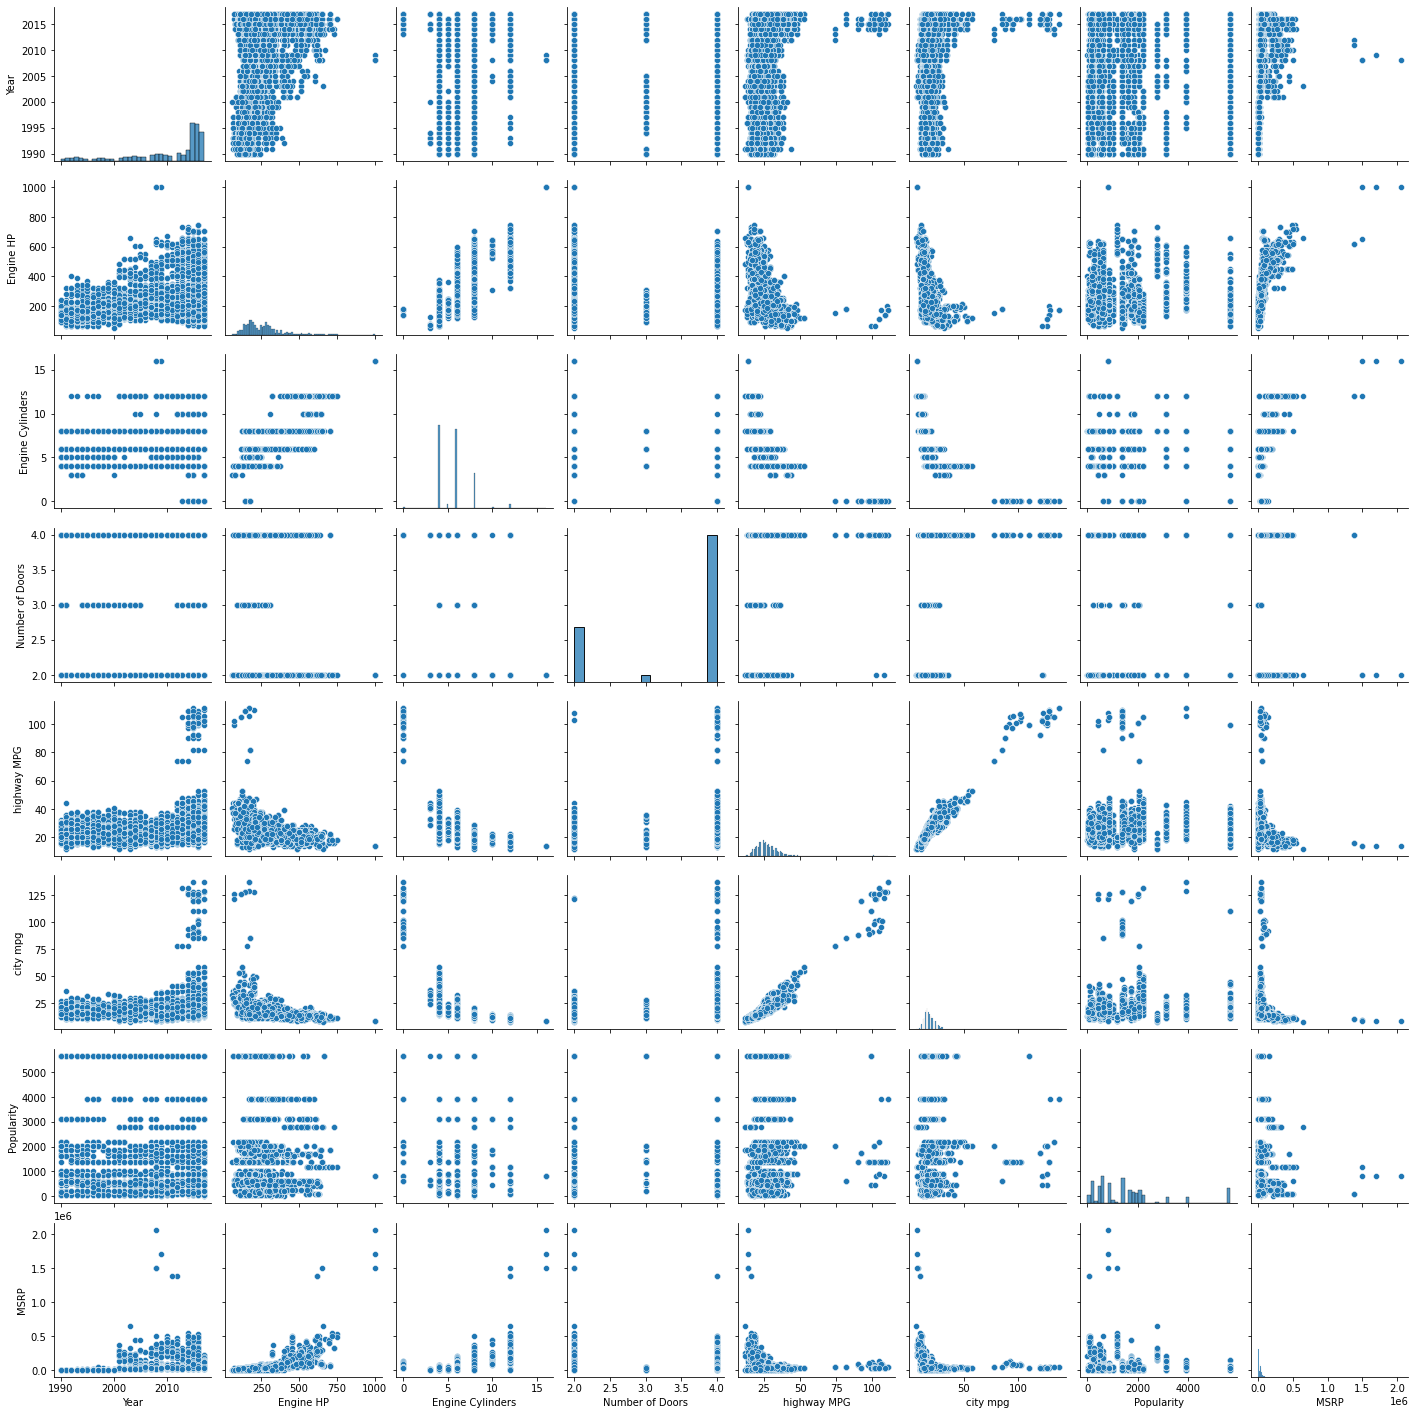

In [495]:
sns.pairplot(df_train)
plt.show()

### Correlation Method

In [496]:
correlation = df_train.corr()['MSRP']
correlation

Year                0.220513
Engine HP           0.651313
Engine Cylinders    0.525116
Number of Doors    -0.125047
highway MPG        -0.163952
city mpg           -0.153010
Popularity         -0.043854
MSRP                1.000000
Name: MSRP, dtype: float64

### Heatmap

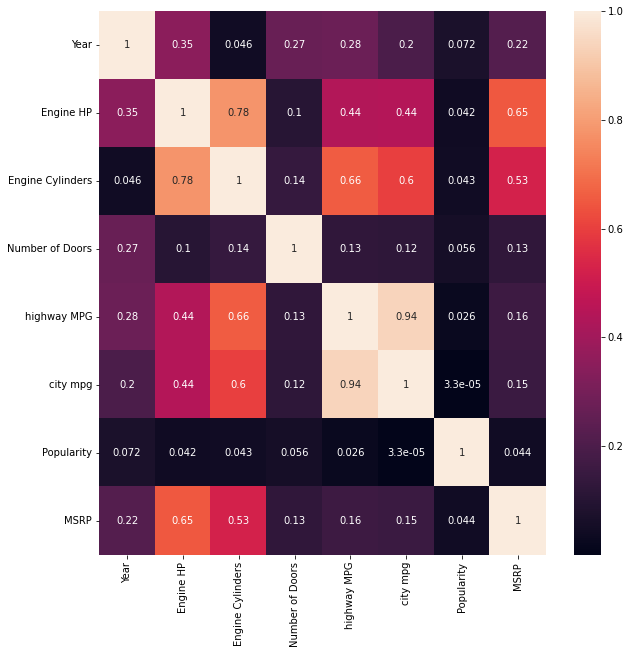

In [497]:
correlation = df_train.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)
plt.show()

### Missing Value Ratio Method


In [498]:
df_train.shape

(9531, 16)

In [499]:
missing_val = (df_train.isna().sum())/df_train.shape[0] * 100
missing_val.sort_values(ascending = False)

Market Category      31.266394
Engine HP             0.587556
Engine Cylinders      0.220334
Number of Doors       0.052460
Engine Fuel Type      0.020984
Make                  0.000000
Model                 0.000000
Year                  0.000000
Transmission Type     0.000000
Driven_Wheels         0.000000
Vehicle Size          0.000000
Vehicle Style         0.000000
highway MPG           0.000000
city mpg              0.000000
Popularity            0.000000
MSRP                  0.000000
dtype: float64

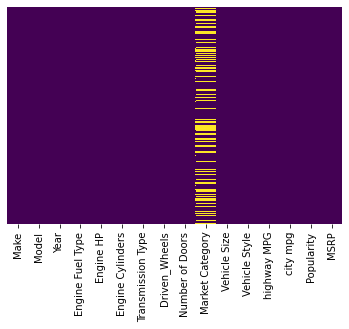

In [500]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [501]:
df_train.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        2
Engine HP              56
Engine Cylinders       21
Transmission Type       0
Driven_Wheels           0
Number of Doors         5
Market Category      2980
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

**Quality Summary >>**
    
    Engine Fuel Type >> has some null values >> object
    Engine Cylinders >> has some null values >> float
    Engine HP        >> has some null values >> float
    Market Category  >> has some null values >> object
    Number of Doors  >> has some null values >> float

## Data Pre-processing

As we know that, Machine Learning Model doesn't understand the Raw data, Hence we are doing the pre-processing on the data to feed the data to ML algorithm.

In [502]:
df_train['Engine Fuel Type'].fillna(df_train['Engine Fuel Type'].mode()[0],inplace=True)
df_test['Engine Fuel Type'].fillna(df_test['Engine Fuel Type'].mode()[0],inplace=True)

In [503]:
df_train['Engine Cylinders'].fillna(df_train['Engine Cylinders'].mean(),inplace=True)
df_test['Engine Cylinders'].fillna(df_test['Engine Cylinders'].mean(),inplace=True)

In [504]:
df_train['Engine HP'].fillna(df_train['Engine HP'].mean(),inplace=True)
df_test['Engine HP'].fillna(df_test['Engine HP'].mean(),inplace=True)

In [505]:
df_train['Market Category'].fillna(df_train['Market Category'].mode()[0],inplace=True)
df_test['Market Category'].fillna(df_test['Market Category'].mode()[0],inplace=True)

In [506]:
df_train['Number of Doors'].fillna(df_train['Number of Doors'].mean(), inplace=True)
df_test['Number of Doors'].fillna(df_test['Number of Doors'].mean(),inplace=True)

In [507]:
df_train.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [508]:
df_test.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

##  Feature Engineering 

### Seperating Features and Target Lable

In [509]:
X_train = df_train.drop(['MSRP'],axis=1)
y_train = df_train['MSRP']

X_test =df_test.drop(['MSRP'],axis=1)
y_test = df_test['MSRP']

print('x_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('x_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (9531, 15)
y_train shape:  (9531,)
x_test shape:  (2383, 15)
y_test shape:  (2383,)


X_train = df_train.drop(['MSRP'],axis=1) >> this will drop the 'MSRP' attribute and pass all the Independent attributes to the X_train

y_train = df_train['MSRP'] >> will assign only dependent attribute ('MSRP' variable) to y_train

### Encoding Categorical Attributes

In [510]:
enc= OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train)

X_train= enc.transform(X_train)
X_test=enc.transform(X_test)

print('x_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('x_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (9531, 1630)
y_train shape:  (9531,)
x_test shape:  (2383, 1630)
y_test shape:  (2383,)


Here, I've used the OneHotEncode Class to build a single Object (enc). I then only fit my "enc" using the data from X train, not the entire dataset or X test. Here, "enc" Object used a training dataset to learn how to encode categorical properties.


I then use the enc.transform(data) method to transform my X train and X test.

Now that we have checked, my X train's size has changed from (9531, 15) to (9531, 1630)

additionally, it updated for X test from (2383, 15) to (2383, 1630).


If handle unknown='error' had been used, If one categorical characteristic in our X test in our X test has a new value that was not present in the X train. If an unknown category is present during the transform, OneHotEncoder will then raise an error. 

As is well known, only numerical features can be used by machine learning algorithms. It is unable to comprehend categorical features. "Nominal Categorical Features" are shown here.

We so employed the OneHotEncoder method. It utilizes categorical variables to operate.
Each binary unique value will be added by OneHotEncoder to your categorical characteristics.

Depending on how many distinct values there are in the original categorical attribute, it will produce new attributes.

Here, 15 traits were changed into 1630 attributes. Our dimensionality has been expanded here in accordance with our category variables.

### Standardization

In [511]:
scaler=StandardScaler(with_mean=False)
scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

print('x_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('x_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (9531, 1630)
y_train shape:  (9531,)
x_test shape:  (2383, 1630)
y_test shape:  (2383,)


Here, I've used the StandardScaler Class to build a single Object (a scaler). I then only fit my "scaler" using the data from X train, not the entire dataset or X test. With the use of the training dataset, the "scaler" object in this case learned how to standardize the categorical properties.

Then, I use the scaler.transform(data) method to transform my X train and X test.
The range of my X train and X test has now changed from 0-n to 0-1, as shown if we inspect it.


The "Standardization" procedure must be used; otherwise, my accuracy will suffer. So I made the decision to standardize the data here.

Normalization >> Normalization of your features means will bring our attributes data in range of 0 to 1.
age 44 to 80 >> normalization >> 0.3 to 1.0


Standardization (Z_score normalization) >> It is a Transformed version of your feature is normal distribution with "mean == 0" & "standard deviation == 1".
Standardization = (each feature - mean of feature) / (standard deviations)

Here, I want to use supervised learning algorithm (KNN, SVM, DecisionTree), Here I had some outliers, and most of the features are Normal distributions Hence, We used the standardization here.

Here, we did Data Prepreocessing and Feature engineering on both Training dataset and Testing dataset. 

If we would have done the Data Prepreocessing and Feature engineering only on the "Training Dataset" and not on the "Testing Dataset" then we will confuse our ML Algorithm. 

e.g. If we do the "Standardization" on Training Dataset & not on the Testing Dataset then one of the attribute from Training dataset will have range from 0 to 1 & one of the attribute from Testing dataset will have range from 0 to 100. 
It will confuse our model and our Accuracy will be less.

Hence we did the Data Prepreocessing and Feature engineering on both Training dataset and Testing dataset.

We Impute missing values on both the dataset, we did the "Standardization" on both the dataset.

### Dimensionality Reduction

In [512]:
pca= PCA(n_components=30)
pca.fit(X_train.toarray())

X_train= pca.transform(X_train.toarray())
X_test= pca.transform(X_test.toarray())

print('x_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('x_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (9531, 30)
y_train shape:  (9531,)
x_test shape:  (2383, 30)
y_test shape:  (2383,)


I've used the PCA Class to construct a single object here, called pca. As we are aware, the PCA algorithm is used to transform datapoints from one 492nd dimensional space to another 492nd dimensional space characteristics. The "n components=30" command was used after this modification to specify that I wanted to maintain the "30 best Principle Component with Highest Variance" features for my dataset.

I then fitted my "PCA" using only the data from the X train and not the entire dataset or X test. With the use of the training dataset, the "PCA" object learned how to "Dimensionality Reduction" categorical attributes.

Then, I use the scaler.transform(data) method to transform my X train and X test.
In this case, it reduced 1630 attributes to 30 attributes. In this case, we reduced the dimensionality without losing any important data.

Since Scikit-Learn uses compressed technique to store a such high dimensional data, I also use the "X train.toarray()" methode to convert dataframe to Numpy Array in this case. After doing the OnHotEncoding, We will attain Higher Dimensionality of our Attributes. However, PCA class cannot handle such a large amount of data; it issues an error and instructs us to transform the enormous Dimensional data into a regular array.

## Model Training

### Algorithm Selection And Hyperparameter Tunning

### Model_1 >> Linear Regression

In [513]:
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

### Model_2 >>  KNN Regression

In [514]:
parameter_grids = {'n_neighbors' : np.arange(5,20,5),
                   'weights': ['uniform', 'distance'],
                  'leaf_size' : np.arange(2,20,2),
                   'p' : [1,2]}

model_2 = GridSearchCV(KNeighborsRegressor(),
                      param_grid=parameter_grids,
                      scoring='r2',
                      cv=5,
                      error_score='raise',
                      n_jobs=-1)

model_2.fit(X_train,y_train)

print('r2 Score of KNeighborsRegressor = {:.2f}'.format(model_2.best_score_))
print('Best found Hyperparameter of KNeighborsRegressor = {}'.format(model_2.best_params_))

r2 Score of KNeighborsRegressor = 0.89
Best found Hyperparameter of KNeighborsRegressor = {'leaf_size': 2, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


### Model_3 >> Decision Tree Regressor

In [515]:
parameter_grids = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error','poisson'],
                  'max_depth' : range(1,30,3), #[1,4,7...]
                  'max_features':[0.25,0.5,0.75,1.0],
                  'min_samples_split' : range(2,20,3)}

model_3 = RandomizedSearchCV(DecisionTreeRegressor(random_state=42),
                      param_distributions= parameter_grids,
                      n_iter= 10,
                      scoring='r2',
                      error_score='raise',
                      cv=5,
                      n_jobs=-1)

model_3.fit(X_train,y_train)

print('r2 Score of DecisionTreeRegressor = {:.2f}'.format(model_3.best_score_))
print('Best found Hyperparameter of DecisionTreeRegressor = {}'.format(model_3.best_params_))

r2 Score of DecisionTreeRegressor = 0.80
Best found Hyperparameter of DecisionTreeRegressor = {'min_samples_split': 14, 'max_features': 0.5, 'max_depth': 19, 'criterion': 'friedman_mse'}


Here, We have defined the dictionary of dictionary of Hyperparameter for Decision Tree Regressor.
Here, most important Hyperparameter for Decision Tree Regressor is, criterion, max_depth, min_samples_split (minimun sample in one node to split it)

Here, We are using RandomizedSearchCV for hyperparameter tunning.

### Model_4 >> Support Vector Machine (SVM) Regressor

In [516]:
parameter_grids = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                   'C' : [0.01, 0.1, 10, 20, 30]
                   }

model_4 = GridSearchCV(SVR(),
                      param_grid=parameter_grids,
                      scoring='r2',
                      error_score='raise',
                      cv=6,
                      n_jobs=-1)

model_4.fit(X_train,y_train)

print('r2 Score of SVM = {:.2f}'.format(model_4.best_score_))
print('Best found Hyperparameter of SVM = {}'.format(model_4.best_params_))

r2 Score of SVM = 0.73
Best found Hyperparameter of SVM = {'C': 30, 'kernel': 'linear'}


A GridSearchCV is this (Grid Search Cross Validation Model). The model (DecisionTreeRegressor()), parameter grids, scoring (the main metric I want to improve is the r2 score), CV (Cross Validation with 5-fold), and n jobs (the number of jobs >> As this method is time-consuming and we must train many models with each combination of these Hyperparameter, we are employing all CPU cores to conduct the parallel execution.

## Model Assessment

In [517]:
y_predict= model_2.predict(X_test)
print('\KNN Regressor R2_Score on Test: ',r2_score(y_test, y_predict)*100,'%')

\KNN Regressor R2_Score on Test:  91.7300428985802 %


In [518]:
mse =  mean_absolute_error(y_test, y_predict)
print('MSE for KNN Regressor: ', round(mse,3))

rmse= np.sqrt(mse)
print('RMSE for KNN Regressor: ', round(rmse,3))

mae = mean_squared_error(y_test, y_predict)
print('MAE for KNN Regressor: ', round(mae,3))

print('Variance score: {}'.format(model_2.score(X_test, y_test)))

MSE for KNN Regressor:  4190.522
RMSE for KNN Regressor:  64.734
MAE for KNN Regressor:  204384481.801
Variance score: 0.917300428985802


Here, variance score near to 1 indicates the perfect prediction

# Conculusion

### Feature Importance Analysis 

Engine HP & Engine Cylinders (Inependent Variable) both features are highly correlated with MSRP (Dependent Variable).   

### Model Explaination

#### Linear Regression Model

Linear Regression is the "Supervised Machine Learning algorithm". Model finds the best fit linear line between the dependent and one or more independent variables. It has two types: Simple Linear Regression and Multiple Linear Regression.

Simple Linear Regression is where only one independent variable is present and the model has to find the linear relationship of it with the dependent variable. 

Equation for Linear Regression: y=b0+b1x

Equation for Muliple Linear Regression: y=b0+b1x1+b2x2+...+bdxd

We have got the highest R2_Score in Linear Regression Algorithm. Hence we are finalizing the same for the deployment.


#### KNN Regression

KNN algorithm used for both regression problems and classification problems. It uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.
Distance between the new point and each training points can be calculated using below three techniques 

- Manhattan (for continuous)-
- Hamming distance (for categorical).
- Euclidian.


#### DecisionTreeRegression

Decision tree is the versatile ML model capable of performing both regression related & classification-related task and even work in case of tasks which has multiple outputs. Decision Tree is powerful algorithms, capable of fitting even complex datasets. It is also the fundamental components of Random Forests, which is one of the most powerful machine learning algorithms available today

### Bias-variance trade off

We were aiming for the model which has Low Bias and Low variance.

So, we uild a righ model with right level of complexity which offers a "Low-Bias Error" & "Low-Variance Error" and Total error which sum of "Bias error" and "Variance error" should be minumum. This is called as "Bias-Variance Trade-Off".


Bias error happens >> due to simplicity of the model, if model is too simple then model can't lear the data perfectly. Hence, Model become too bias, Model didn't have enough power to learn the data.

If the Feature data is not linear data, and if we use LinearRegression() here, then we get high bias error. Model makes a wrong assumption about the data. LinearRegression will not fit completly. Model will assume that data is too simple and linear, accordingly it predict the price, but this is not the case. Our data is a complex data and its not a linear data, hence we are getting high bias error.


Variance >> If our model is too complex then we get the Variance error. If our model is too complex then it always tries to catch the each and every data points, and this model becomes 'train_data specific model' and gives High Accuracy on the training dataset. Here, Problem is, This model can't generalize the data points, Althoguh this model is so complex and learnt the training data set perfectly,But when new dataset (X_test) feed to this model, then Model cant predict accurately.

### Overfitting and Underfitting Error

When our model is too simple then we called it as "High Bias Error" or "Underfitting" >> Model underfits the training data points. Model can't able to learn the data perfectly. 


### Strength Weaknesses of our Pipeline & Recommandation

This experiment carefully analyzed all thing, and and able achieve the best R2_score for that.

Strength Weaknesses of Our Pipeline:- 

   Strength >>
        Here we have used all the techniques which generalize our model for all the data points.
        We permform operations like 
        
            "Encoding categorical Attributes using OneHotEncoder"
            
            "Standardization on the data so that they are in same range"
            
            "Dimensionality reduction Using PCA (Principle Component Analysis) so that we can have the features with Highest                Variance"
            
            "We trained our model with different algorithms like (Linear Regression, KNN Regression, DecisionTreeRegressor, SVM)"
            
            "We performed the Hyper-Parameter tunning to optimize the model"
            
            "We evaluate our model using Test dataset for all the algorithm"
            
            "We got R2_score, MSE, RMSE, and MAE model"
            


   Weakness >>
            "Less data samples"
            
            "Only 3-4 features are correlated with  labels"
            "Data is not normalized"
            
            
Recommendation >> If user could share more data points then further advanced neural network algorithm can be used to maximize the r2_score of the model.

### References 

Below are the resources to learn more about the dataset and tools:

Dataset: https://drive.google.com/file/d/1cv_QttsCC5Y9GJiQ6qO6lC6_D73qQQnH/view?usp=share_link

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html


sklearn algorihtm: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning